Saving archive (1).zip to archive (1) (4).zip
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------

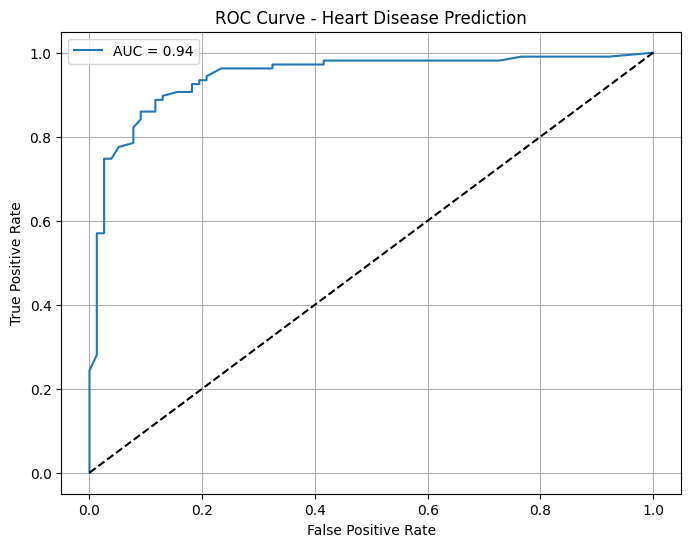

In [ ]:
# 📌 Heart Disease Prediction - CodeAlpha Internship (Task 4)

# Step 1: Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 3: Load Dataset
# Upload manually using the Colab file uploader
from google.colab import files
uploaded = files.upload()

# Load the CSV file (after uploading)
# Assuming the uploaded file is a zip containing a single CSV, we can extract and read it
import zipfile
import io

# Get the file name from the uploaded dictionary
uploaded_file_name = list(uploaded.keys())[0]

# Read the zip file
with zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_name]), 'r') as z:
    # Assuming the CSV is the first file in the zip
    csv_file_name = z.namelist()[0]
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


# Step 4: Explore Dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 5: Preprocessing
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Identify categorical and numerical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 7: Train Model (Random Forest) with preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"🎯 ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

# Step 10: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Heart Disease Prediction")
plt.legend()
plt.grid()
plt.show()